In [33]:
# Mount Google Drive to access files stored there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Import necessary libraries for data manipulation, machine learning, and visualization
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [35]:
# Paths to your dataset in Google Drive
train_data_path = '/content/drive/My Drive/archive/train.csv'
test_data_path = '/content/drive/My Drive/archive/test.csv'

# Load the UCI HAR dataset into pandas DataFrames
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [36]:
# Display basic information about the datasets
print("Train Data Info:")
print(df_train.info())
print("Test Data Info:")
print(df_test.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None
Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB
None


In [37]:
# Check for data types, duplicates, and missing values
print(df_train.dtypes)
print(df_train.duplicated().sum())  # Count of duplicate rows
print(df_train.isna().sum())  # Count of missing values

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object
0
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [38]:
# Group data by subject to ensure it's not biased
print(df_train['subject'].groupby(df_train['subject']).count())

subject
1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
Name: subject, dtype: int64


<ipython-input-39-a829fc3ba32c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=df_train, palette="Set2")  # Color palette for a colorful plot


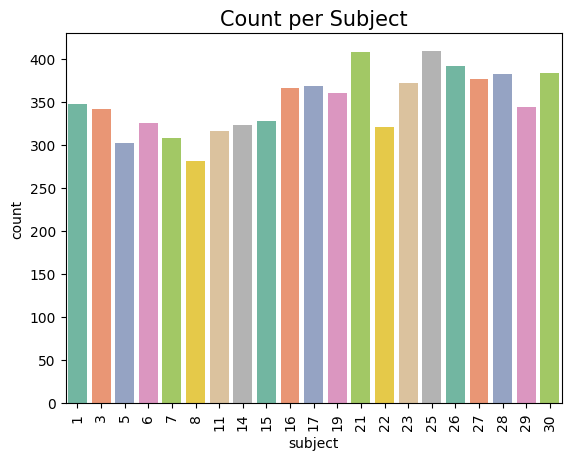

In [39]:
# Visualize the distribution of subjects with colorful plots
plt.title('Count per Subject', fontsize=15)
sns.countplot(x='subject', data=df_train, palette="Set2")  # Color palette for a colorful plot
plt.xticks(rotation=90)
plt.show()

<ipython-input-40-a896ce878e4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Activity', data=df_train, palette="Set3")  # Color palette for a colorful plot


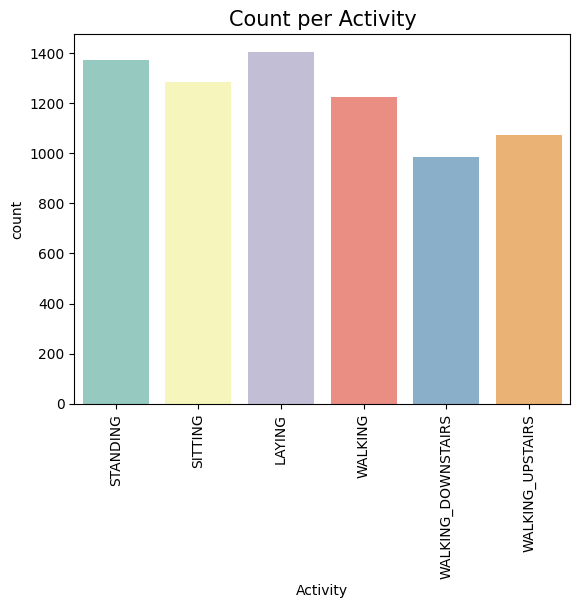

In [40]:
# Visualize the distribution of activities
plt.title('Count per Activity', fontsize=15)
sns.countplot(x='Activity', data=df_train, palette="Set3")  # Color palette for a colorful plot
plt.xticks(rotation=90)
plt.show()

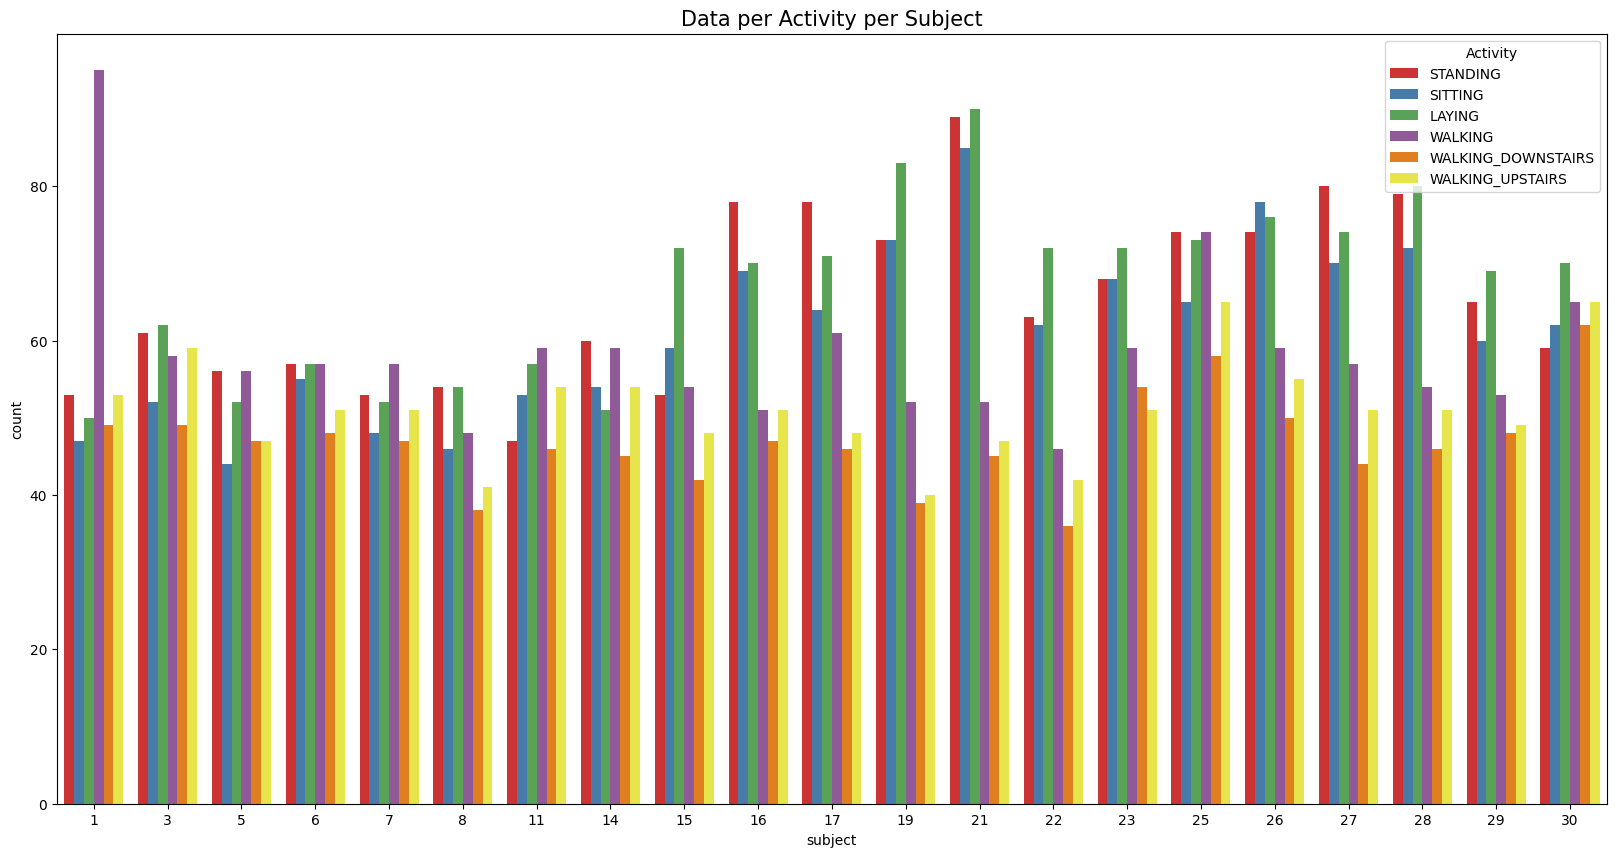

In [41]:
# Visualizing the data per subject and activity
plt.figure(figsize=(20, 10))
plt.title('Data per Activity per Subject', fontsize=15)
sns.countplot(x='subject', hue='Activity', data=df_train, palette="Set1")  # Colorful hue
plt.show()

<ipython-input-42-8a62c435bf95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y='tBodyAccMag-mean()', data=df_train, showfliers=False, palette="coolwarm")


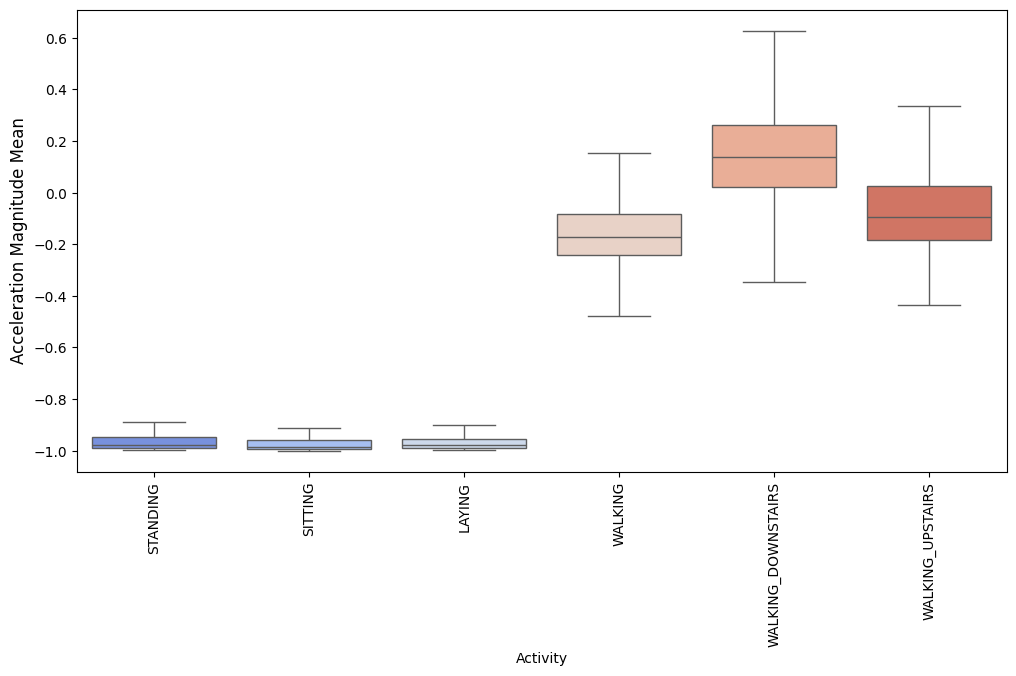

In [42]:
# Visualizing the difference in mean acceleration for static vs dynamic activities
plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()', data=df_train, showfliers=False, palette="coolwarm")
plt.ylabel('Acceleration Magnitude Mean', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<ipython-input-43-75db89c1ae07>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y='tGravityAcc-mean()-X', data=df_train, showfliers=False, palette="coolwarm")


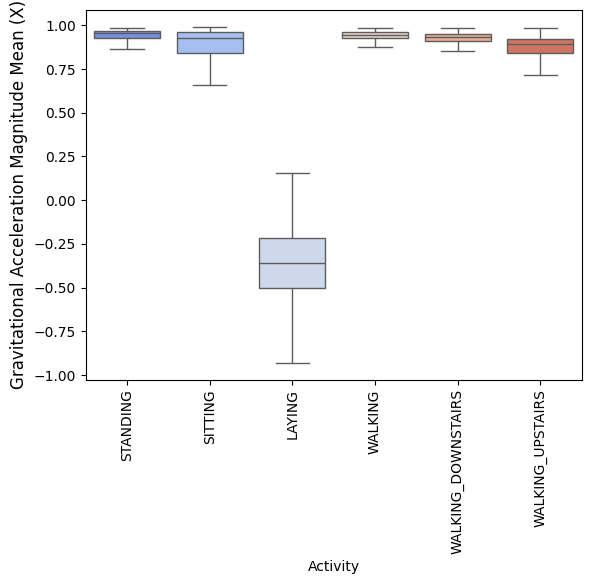

In [43]:
sns.boxplot(x='Activity', y='tGravityAcc-mean()-X', data=df_train, showfliers=False, palette="coolwarm")
plt.ylabel('Gravitational Acceleration Magnitude Mean (X)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<ipython-input-44-7c6db4556c17>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y='tGravityAcc-mean()-Y', data=df_train, showfliers=False, palette="coolwarm")


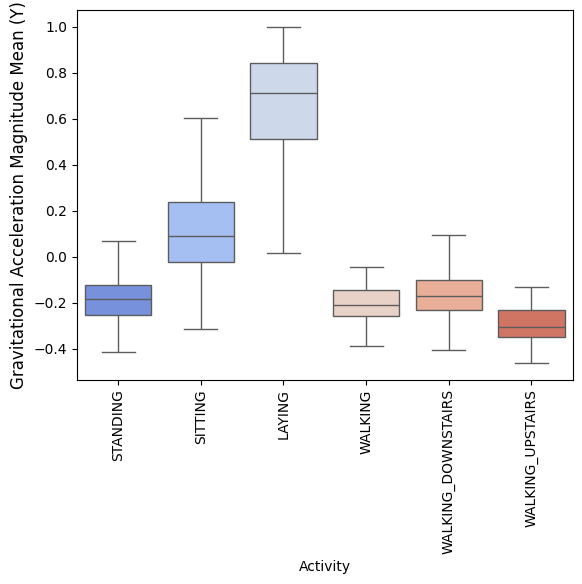

In [44]:
sns.boxplot(x='Activity', y='tGravityAcc-mean()-Y', data=df_train, showfliers=False, palette="coolwarm")
plt.ylabel('Gravitational Acceleration Magnitude Mean (Y)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<ipython-input-45-06e73eebcf40>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=df_train, showfliers=False, palette="coolwarm")


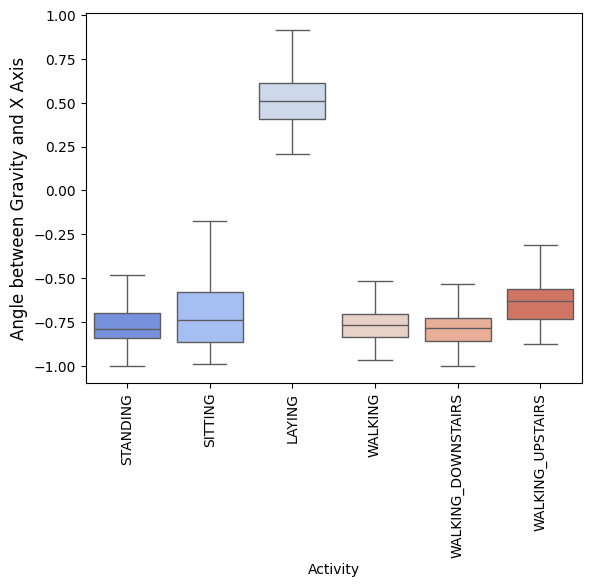

In [45]:
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=df_train, showfliers=False, palette="coolwarm")
plt.ylabel('Angle between Gravity and X Axis', fontsize=12)
plt.xticks(rotation=90)
plt.show()

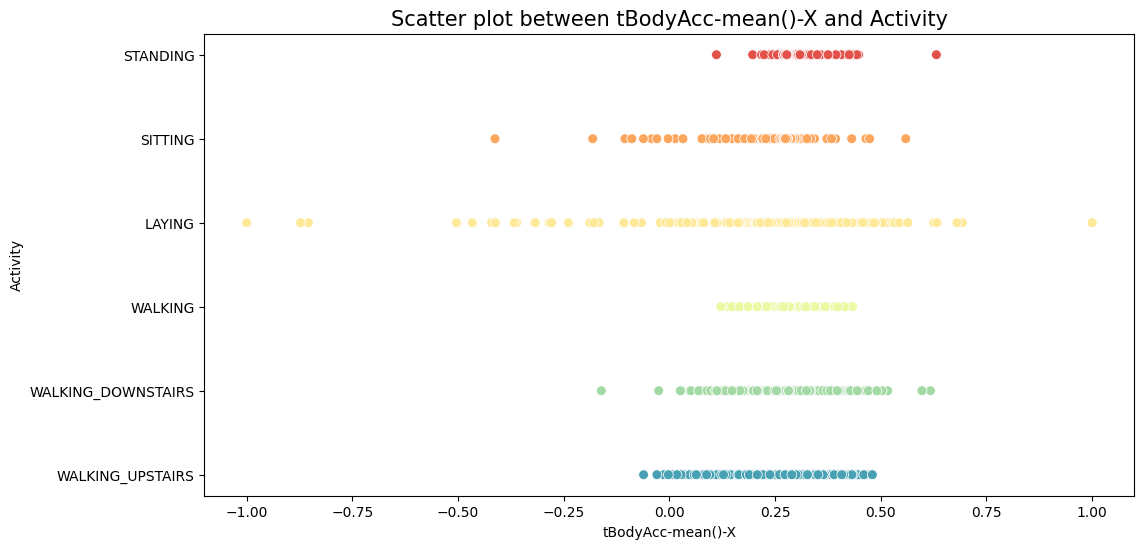

In [46]:
# Scatter plot to observe the relationship between 'tBodyAcc-mean()-X' and Activity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tBodyAcc-mean()-X', y='Activity', data=df_train, s=50, hue='Activity', palette="Spectral", legend=None)
plt.title('Scatter plot between tBodyAcc-mean()-X and Activity', fontsize=15)
plt.show()


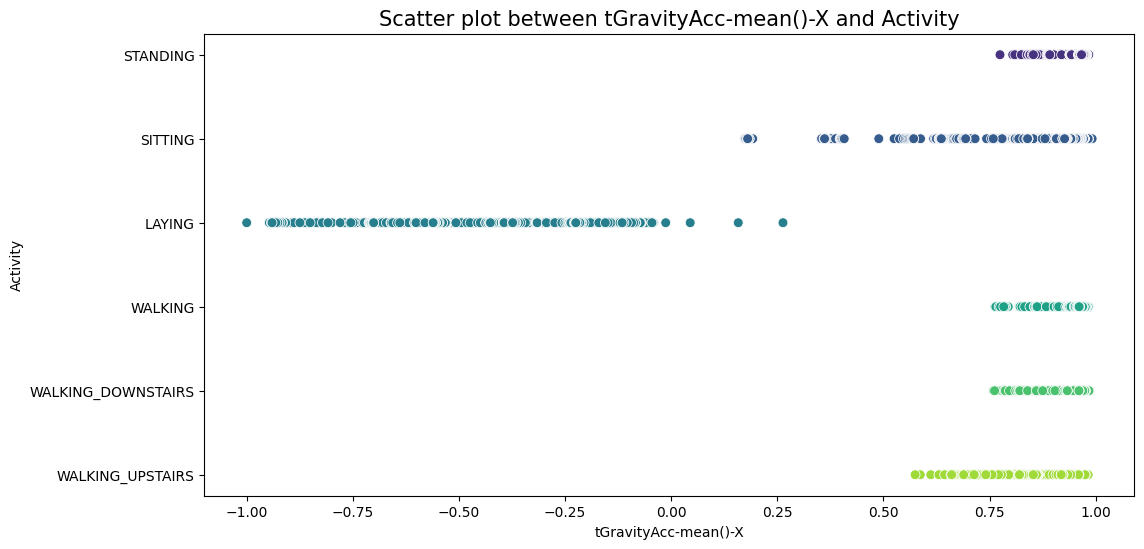

In [47]:
# Scatter plot to observe the relationship between 'tGravityAcc-mean()-X' and Activity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tGravityAcc-mean()-X', y='Activity', data=df_train, s=50, hue='Activity', palette="viridis", legend=None)
plt.title('Scatter plot between tGravityAcc-mean()-X and Activity', fontsize=15)
plt.show()

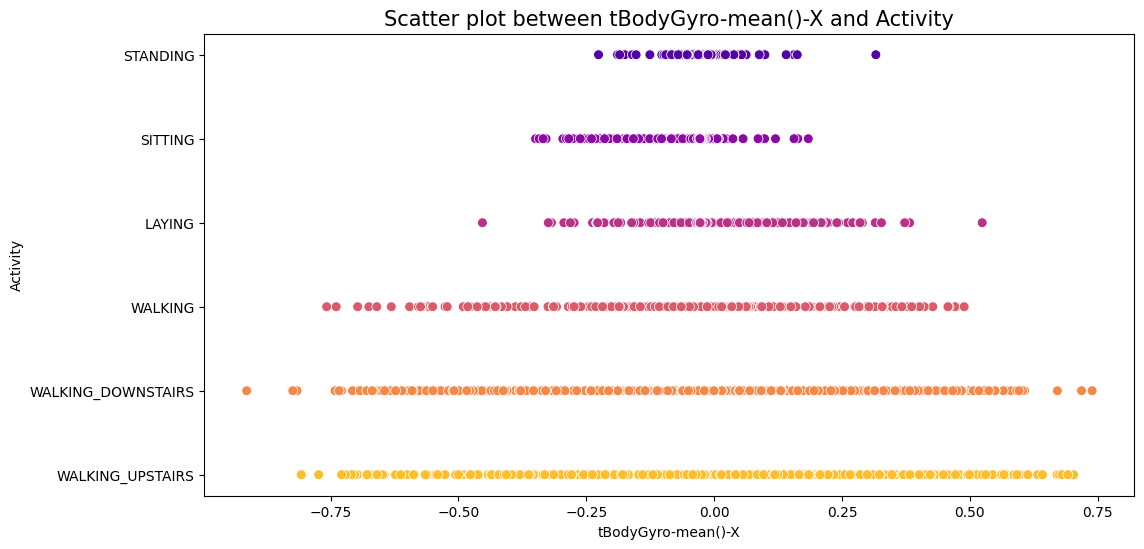

In [48]:
# Scatter plot to observe the relationship between 'tBodyGyro-mean()-X' and Activity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tBodyGyro-mean()-X', y='Activity', data=df_train, s=50, hue='Activity', palette="plasma", legend=None)
plt.title('Scatter plot between tBodyGyro-mean()-X and Activity', fontsize=15)
plt.show()

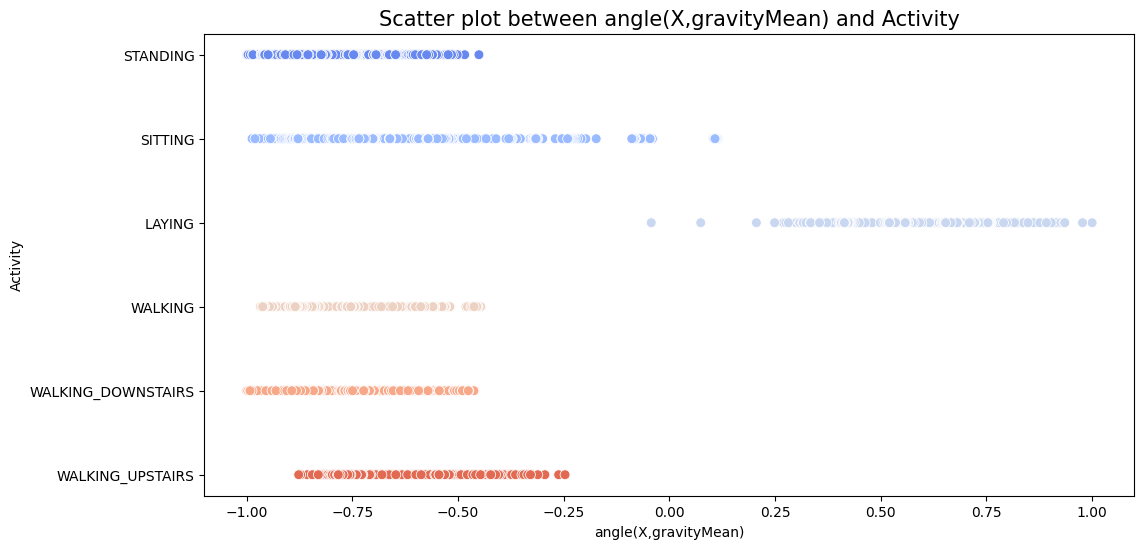

In [49]:
# Scatter plot to observe the relationship between 'angle(X,gravityMean)' and Activity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='angle(X,gravityMean)', y='Activity', data=df_train, s=50, hue='Activity', palette="coolwarm", legend=None)
plt.title('Scatter plot between angle(X,gravityMean) and Activity', fontsize=15)
plt.show()

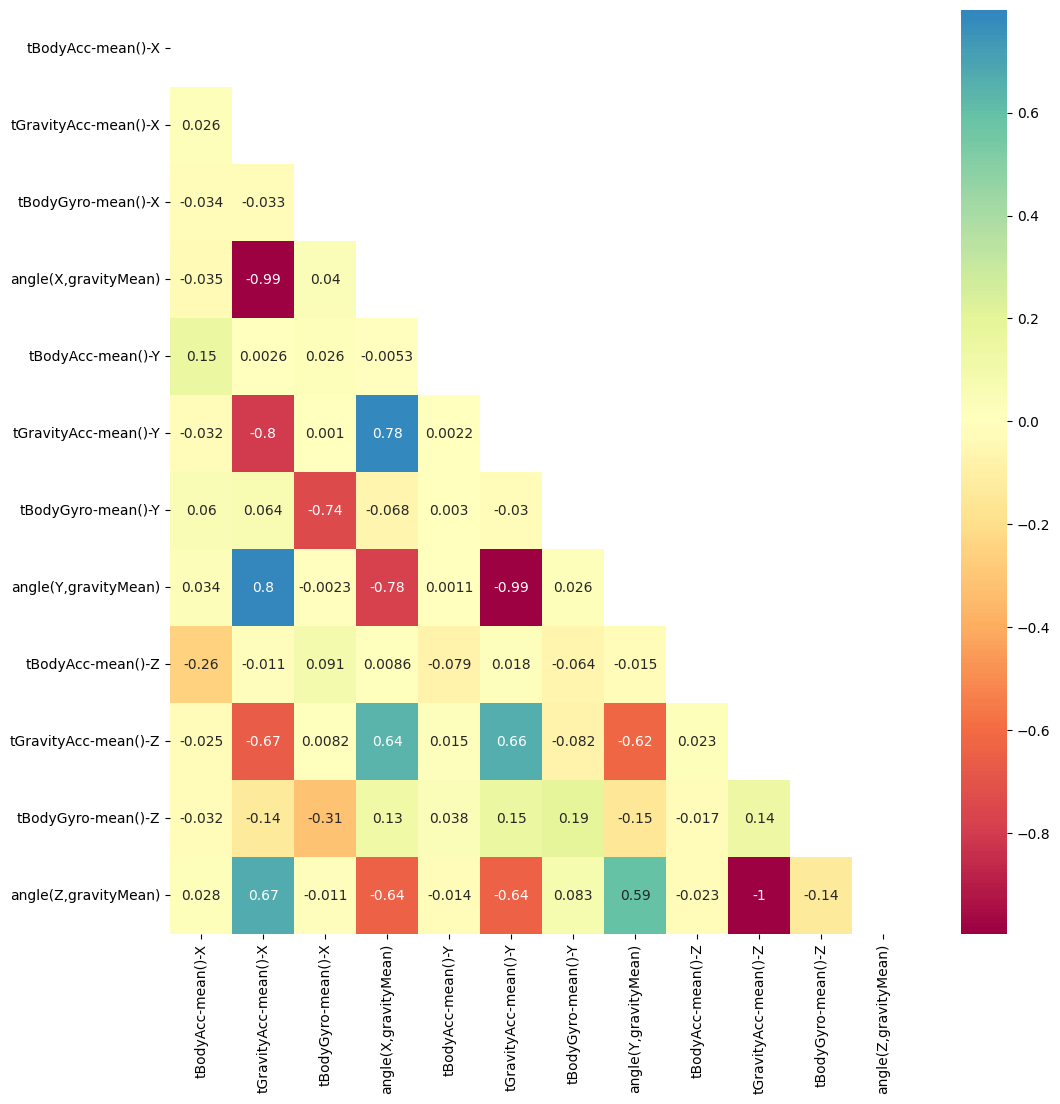

In [50]:
# Analyzing correlation between selected features
df_select = df_train[['tBodyAcc-mean()-X', 'tGravityAcc-mean()-X', 'tBodyGyro-mean()-X',
                      'angle(X,gravityMean)', 'tBodyAcc-mean()-Y', 'tGravityAcc-mean()-Y',
                      'tBodyGyro-mean()-Y', 'angle(Y,gravityMean)', 'tBodyAcc-mean()-Z',
                      'tGravityAcc-mean()-Z', 'tBodyGyro-mean()-Z', 'angle(Z,gravityMean)']]
corr = df_select.corr()

# Plot heatmap for correlation
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, mask=np.triu(np.ones_like(corr, dtype=bool)), cmap="Spectral", center=0)
plt.show()

In [51]:
# Ensure 'Activity' is categorical
df_train['Activity'] = df_train['Activity'].astype('category')

# Select relevant columns for visualization
df_select = df_train[['tBodyAcc-mean()-X', 'tGravityAcc-mean()-X', 'tBodyGyro-mean()-X',
                      'angle(X,gravityMean)', 'tBodyAcc-mean()-Y', 'tGravityAcc-mean()-Y',
                      'tBodyGyro-mean()-Y', 'angle(Y,gravityMean)', 'tBodyAcc-mean()-Z',
                      'tGravityAcc-mean()-Z', 'tBodyGyro-mean()-Z', 'angle(Z,gravityMean)', 'Activity']]

# Create pairplot to visualize relationships with colorful hue
sns.pairplot(df_select, hue='Activity', height=4, palette="Set2")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [52]:
# Select features using SelectKBest
from sklearn.model_selection import train_test_split
X_train = df_train.drop(columns=['Activity', 'subject'])
y_train = df_train['Activity']
select_features = SelectKBest(f_classif, k=561).fit(X_train, y_train)

select_features_df = pd.DataFrame({'Feature': list(X_train.columns), 'Scores': select_features.scores_})
select_features_df.sort_values(by='Scores', ascending=False).iloc[:20]


,Feature,Scores
366,fBodyAccJerk-entropy()-X,36918.103883
40,tGravityAcc-mean()-X,29362.642369
52,tGravityAcc-min()-X,28175.402833
367,fBodyAccJerk-entropy()-Y,28115.915817
49,tGravityAcc-max()-X,26686.804095
56,tGravityAcc-energy()-X,25981.558817
523,fBodyBodyAccJerkMag-entropy(),23619.245704
234,tBodyAccJerkMag-entropy(),23437.114915
287,fBodyAcc-entropy()-X,23221.614156
102,tBodyAccJerk-entropy()-X,22267.085935


In [53]:
# Perform PCA and visualize the explained variance
pca = PCA(n_components=120)
pca_fit = pca.fit(X_train)

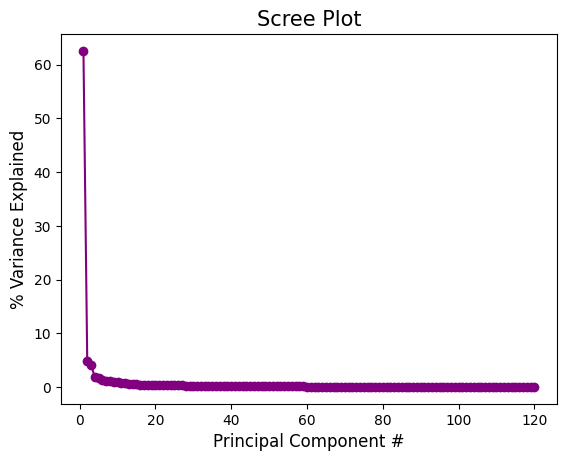


Total Variance Explained: 98.14651995975602 %


In [54]:
# Scree plot with colorful markers
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_ * 100, 'o-', color='purple')
plt.title('Scree Plot', fontsize=15)
plt.xlabel('Principal Component #', fontsize=12)
plt.ylabel('% Variance Explained', fontsize=12)
plt.show()

print('\nTotal Variance Explained:', sum(pca.explained_variance_ratio_) * 100, '%')

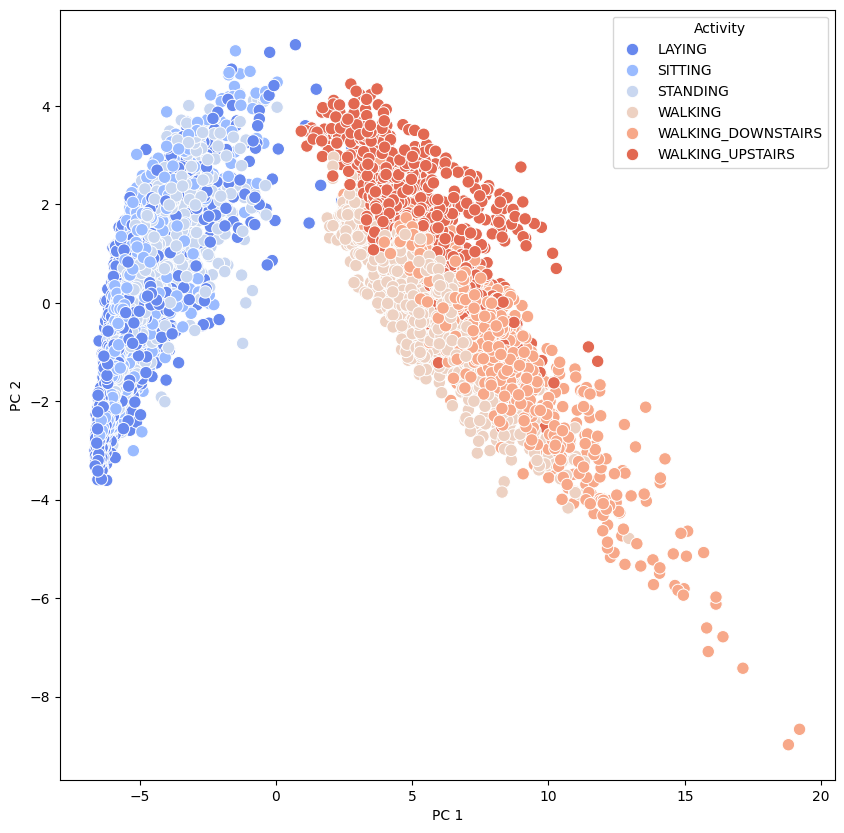

In [55]:
# Apply PCA to the train and test data
feature_selector = PCA(120, random_state=0)
X_train = feature_selector.fit_transform(X_train)
X_test = feature_selector.transform(df_test.drop(columns=['Activity', 'subject']))

# Plot PCA components with vibrant colors
pca_plot_df = pd.DataFrame(data=X_train[:, 0:2], columns=['PC 1', 'PC 2'])
pca_plot_df = pd.concat([pca_plot_df, df_train['Activity']], axis=1)

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC 1', y='PC 2', hue='Activity', data=pca_plot_df, palette="coolwarm", s=80)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.002s...
[t-SNE] Computed neighbors for 7352 samples in 1.019s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.317932
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.865700
[t-SNE] KL divergence after 1000 iterations: 1.372661


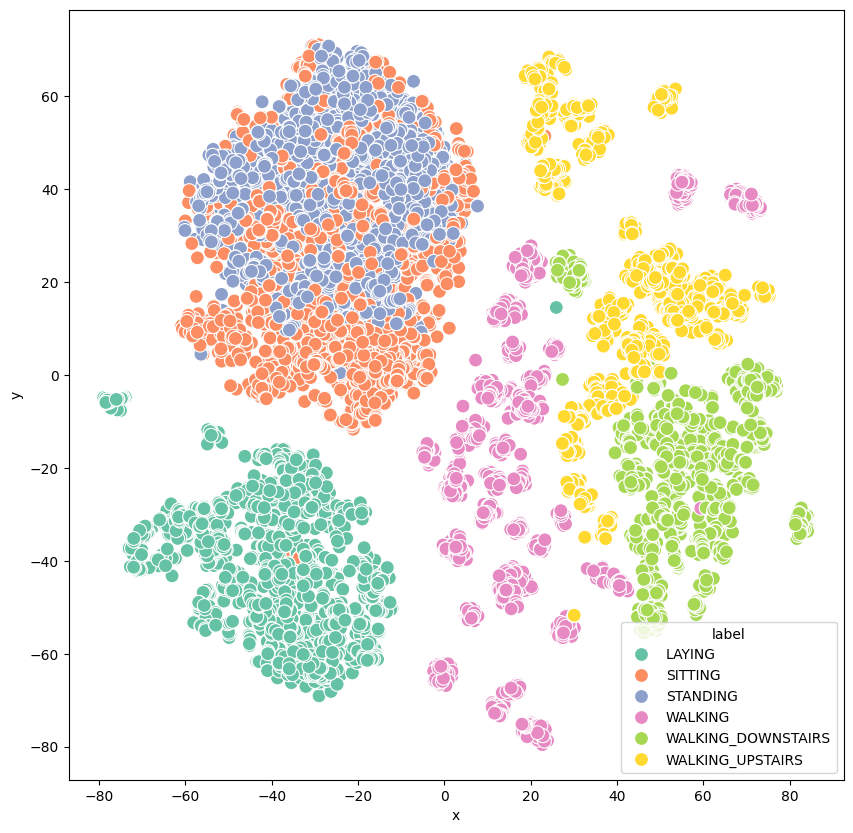

In [56]:
# Perform t-SNE for dimensionality reduction
tsne = manifold.TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(X_train)

# Create DataFrame for t-SNE plot
df_tsne = pd.DataFrame(columns=["x", "y", "label"])
df_tsne["x"] = tsne[:, 0]
df_tsne["y"] = tsne[:, 1]
df_tsne["label"] = y_train

# Plot the t-SNE results with a colorful palette
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x', y='y', hue='label', data=df_tsne, palette="Set2", s=100)
plt.show()
